In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def propensity(k, *args):
    '''Calculate the propersity of a reaction with two reactants
    
    parameters
    ----------
    k:int
      reaction constant
    *args:int(s)
      molecular number of reactant(s)
    
    Returns
    -------
    out: int
       propensity of a reaction
    '''
    
    for i in args:
        k=k*i
    return k


def reaction1(x,y,z):   #reaction 1,2,5: X+Y->Z
    '''Calculate the molecular number change of reaction type 1:X+Y->Z 
       (two reactants and one product)
    
    parameters
    ----------
    x:int
      molecular number of first reactant
    y:int
      molecular number of second reactant
    z:int
      molecular number of first product
      
    Returns
    -------
    out: int
       molecular numbers of reactants and product after the reaction has occurred once
    '''
    
    if x>0 and y>0:     
        return x-1,y-1,z+1


def reaction2(a, d, e=0):   #reaction 3: a+b->c+d
    '''Calculate the molecular number change of reaction type 2:A+E->E+D
       (two reactants and two products, but one of the reactants is also the product)
    
    parameters
    ----------
    a:int
      molecular number of first reactant
    d:int
      molecular number of second reactant
    e:
      molecular number of the chemical which both appears in reactant and product
      
    Returns
    -------
    out: int
       molecular numbers of reactants and products after the reaction has occurred once 
       (value will not change after reaction)
    '''
    if a>0:
        return a-1, e, d+1


def reaction3(e,f,g):   #reaction 4: E->F+G
    '''Calculate the molecular number change of reaction type 3:E->F+G
       (one reactant and two products)
    
    parameters
    ----------
    e:int
      molecular number of reactant
    f:int
      molecular number of first product
    g:int
      molecular number of second product
      
    Returns
    -------
    out: int
       molecular numbers of reactants and products after the reaction has occurred once
    '''
    if e>0:
        return e-1,f+1,g+1


def directmethod(initialspecies_list,reconstant_list,t1_list):
    '''Use the Direct Method to simulate one reaction step of the system with 5 reactions in Gibson et al 
    
    parameters
    ----------
    initialspecies_list: list
      list that stores molecular number of all the 7 chemicals (A~G) involved in the 5 reactions
    reconstant_list: list
      list that stores reaction constants of 5 chemical reactions (values will not change as reaction occur)
    t1_list: list
      list that store the updating time after one step
      
    Returns
    -------
    out: tuple with 4 elements
       first element: list
            update the No. of each chemical species after one step
       second element: float
            update the time after one step
       third element: list
            update the propensity of each reaction after one step
       forth element:boolean
            determine if the system has reached equilibrium 
            (False: not reach equilibrium; True: reach equilibrium)
    '''        
    a=initialspecies_list[0]
    b=initialspecies_list[1]
    c=initialspecies_list[2]
    d=initialspecies_list[3]
    e=initialspecies_list[4]
    f=initialspecies_list[5]
    g=initialspecies_list[6]
    k1=reconstant_list[0]
    k2=reconstant_list[1]
    k3=reconstant_list[2]
    k4=reconstant_list[3]
    k5=reconstant_list[4]
    
    in_equilibrium = False
    prop1=propensity(k1,a,b)
    prop2=propensity(k2,b,c)
    prop3=propensity(k3,d,e)
    prop4=propensity(k4,f)
    prop5=propensity(k5,e,g)     # calculate the propensity of reaction 1~5
    
    #species_list=[a,b,c,d,e,f,g]      
    propensity_list=[prop1,prop2,prop3,prop4,prop5]    # store the propensity of reaction 1~5 in each while loop
    sumprop=sum(propensity_list)
    prob_list=[]
    if sumprop>0:                                       # if the sum of propensity is positive, then calculate the probablity 
        for i in propensity_list:                     # of each reaction according their propensity
            prob_list.append(i/sumprop)  
    elif sumprop==0:                                 # if the sum of propensity is 0, which means that all of the 5 propensities
        in_equilibrium = True                        # are 0, the system reaches equilibrium--> No further reaction will occur
    else:                                              # if the sum of propensity is negative, means an input error
        print("Error: negative propensities.")     

    if sum(prob_list)!=0:                              # if sum of prob_list is not 0, which  means system does not
        u=random.choice(np.arange(0,5),p=prob_list)    # reach equilibrium, choose which reaction will occur according to their
        tau=random.exponential(1/sumprop)              # probablity distribution as well as choose the occurrance time of the
                                                       # selected reaction according to the exponential with parameter sumprop
        if u==0:
            a, b, c = reaction1(a,b,c)
        elif u==1:
            b, c, d = reaction1(b,c,d)
        elif u==2:
            d,e,f = reaction2(d,f,e)
        elif u==3:
            f,d,g = reaction3(f,d,g)       
        else: 
            e,g,a = reaction1(e,g,a)            # update the no. of moleculars to reflect the execution of selected reaction

    else:                             # if sum of prob_list is 0, which means system has reached equilibrium,just give the last
        tau=t1_list[-1]               # element in t1_list to tau, which is the time that system reached equilibrium.
        
    species_list=[a,b,c,d,e,f,g]     # update the no. of moleculars to reflect the execution of selected reaction
    
    return species_list, tau, propensity_list, in_equilibrium


def window(t1,t2,t1_list,n):
    '''Calculate the index of first element in reaction occurrance time list 
        between each certain time intervals from t1 to t2
    
    parameters
    ----------
    t1: int
      initial time
    t2: int
      ending time
    t1_list: list
      store the reaction occurance time during the stimulation
    n: int
      how many even time intervals we would like to get from t1 to t2
    
    Returns
    -------
    out: list
       the index of the first element in reaction occurrance time list between each 
       certain time intervals from t1 to t2
    '''
    
    t_list=np.linspace(t1,t2,n)   # divide the time period from t1 to t2 into n time intervals evenly
    
    index_x = []    
    for j in range(len(t_list)-1):
        elements_between = []
        for i in range(len(t1_list)):
            if t1_list[i]>=t_list[j] and t1_list[i]<t_list[j+1]: # find the indexes of all elements in t1_list between two time 
                elements_between.append(i)                      # intervals in t_list
        if len(elements_between)>0:          # if there are elements in t1_list between two time intervals in t_list, then 
            index_x.append(elements_between[0])  # put the index of the first element in index_x (i.e. the first element in 
                                                 # list elements_between)
        elif len(elements_between)==0:        # if there are no elements in t1_list between two time intervals in t_list, then
            index_x.append(i-1)              # just store the previous i into index_x
    return index_x


def stimulation(x,t1,t2):
    '''Stimulate the reactions during a given time period from t1 to t2
    
    parameters
    ----------
    x:nested list with 2 list elements
      first list element: list that stores molecular number of all the 7 chemicals (A~G) involved in the 5 reactions
      second list element: list that stores reaction constants of 5 chemical reactions
    t1: int
      initial time
    t2: int
      ending time
    
    Returns
    -------
    out: tuple with 4 elements
       first element:the molecular number of 7 chemical species when system reaches equilibrium
       second element:the time that system reaches equilibrium
       third element: list that store the updating time after each reaction step (while loop)
       forth element: list that store the updating molecular number of 7 chemical species at each reaction step (while loop)
    '''
    
    t0=t1      # use t0 to store the initial value of t1 (stimulation starting time)
    t1_list=[]   # will be used to store the updating reaction time t1
    chemical_list=[]  # will be used to store the list that store the updating molecular number of 7 chemical species
    
    while t1<t2:
        y=directmethod(x[0],x[1],t1_list)
        if y[3]==False:    # if in_equilibrium is still false, it means the system does not reach equilibrium
            x[0]=y[0]    # update the molecular number of chemical species for directmethod function to execute
            t1+=y[1]     # update the reaction time t1
            t1_list.append(t1)  # store the reaction time t1 into t1_list
            chemical_list.append(x[0])  # store the list that store the updating molecular number of chemical species into
                                        # chemical_list
        
        else:                               # if in_equilibrium is true, it means the system has reached equilibrium
            equilstate=chemical_list[-1]    # the molecular number of chemicals and time at equilibrium should be the same 
            equiltime=t1_list[-1]           # as "if" terminates. 
            break
        
    return equilstate, equiltime, t1_list, chemical_list
    

def repeat(x,t1,t2,m,n):
    '''Run the stimulation certain times.
    
    parameters
    ----------
    x:nested list with 2 list elements
      first list element: list that stores molecular number of all the 7 chemicals (A~G) involved in the 5 reactions
      second list element: list that stores reaction constants of 5 chemical reactions
    t1: int
      initial time
    t2: int
      ending time
    m: int
      how many even time intervals we would like to get from t1 to t2
    n: int
      how many times we would like to run the stimulation
      
    Returns
    -------
    out: list
       list that store the molecular number of chemical species at certain "windows" at each round of stimulation
    '''
    fixed_list=[6,14,8,12,9,3,5]    # giving the initial value of molecular number of chemical species for
    wholewindow_list=[]             # each round of stimulation
    n0=1
    
    while n0<=n:
        y=stimulation(x,t1,t2)    # run the stimulation
        w=window(t1,y[1],y[2],m)  # divide the time from initial time to time that reach equilibrium into m parts, and 
        window_list=[]            # get the index of the first element in reaction occurrance time list between each 
                                  # certain time intervals
        for i in w:
            if i==0:               # i==0, means the window at initial time, just store the initial value of molecular numbers
                window_list.append(fixed_list)   # into window list
            else: 
                window_list.append(y[3][i-1])  # the chemical molecular No. at # each time interval point should be the same 
                                               # as the one in chemical_list just prior to the fist element berween 
                                               # corresponding time intervals.
        
        wholewindow_list.append(window_list)#store the list at certain windows at each round of stimulation into wholewindow_list
        x[0]=fixed_list  # reset the initial value of molecular number of 7 chemical species to fixed_list after each round of 
        n0+=1            # stimulation
    
    return wholewindow_list
        
        
def array(x):
    '''Convert a list into a np.array
    
    parameters
    ----------
    x:list
    
    Returns
    -------
    out: np.array
    '''
    
    return np.array(x)

In [6]:
x=[[6,14,8,12,9,3,5],[1,2,3,4,5]]
t1=1
t2=10
m=20
n=10

y=repeat(x,t1,t2,m,n)
z=array(y)
#print(y)
print(z)

[[[ 6 14  8 ...,  9  3  5]
  [ 6  4  6 ...,  5 17  2]
  [ 6  0  6 ...,  3 15  4]
  ..., 
  [ 9  0  6 ...,  0  2 15]
  [ 9  0  6 ...,  0  2 15]
  [ 9  0  6 ...,  0  2 15]]

 [[ 6 14  8 ...,  9  3  5]
  [10  8  4 ...,  4 11  2]
  [11  7  5 ...,  2 12  1]
  ..., 
  [10  0  4 ...,  0  2 13]
  [10  0  4 ...,  0  2 13]
  [10  0  4 ...,  0  2 13]]

 [[ 6 14  8 ...,  9  3  5]
  [ 7  4  6 ...,  4  8  1]
  [ 9  1  5 ...,  1 10  1]
  ..., 
  [10  0  4 ...,  0  2 17]
  [10  0  4 ...,  0  2 17]
  [10  0  4 ...,  0  2 17]]

 ..., 
 [[ 6 14  8 ...,  9  3  5]
  [11  5  3 ...,  2 11  1]
  [ 8  1  5 ...,  2 15  4]
  ..., 
  [10  0  4 ...,  0  2 17]
  [10  0  4 ...,  0  2 17]
  [10  0  4 ...,  0  2 17]]

 [[ 6 14  8 ...,  9  3  5]
  [10  3  3 ...,  2 12  1]
  [11  2  2 ...,  1 13  4]
  ..., 
  [12  0  0 ...,  0  2 18]
  [12  0  0 ...,  0  2 18]
  [12  0  0 ...,  0  2 18]]

 [[ 6 14  8 ...,  9  3  5]
  [ 8  7  5 ...,  5 11  1]
  [ 8  6  6 ...,  4 11  4]
  ..., 
  [ 8  0  8 ...,  0  2 19]
  [ 8  0  8 ..., 

In [17]:
t_list=np.linspace(0,10,5)
print(t_list)

[  0.    2.5   5.    7.5  10. ]


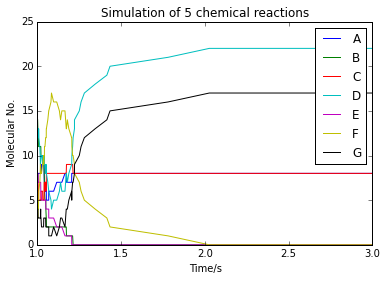

In [4]:
m=np.array(t1_list)
n=np.array(chemical_list)
plt.plot(m,n)
# print(fig)
plt.xlim(t0,t0+2)
plt.title('Simulation of 5 chemical reactions')
plt.xlabel('Time/s')
plt.ylabel('Molecular No.')
plt.legend(['A', 'B', 'C', 'D', 'E', 'F', 'G'])     # plot the figure of stimulation 
plt.show()        
    